# Visualize module overlap

In [2]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/jaccard_similarity_matrix_mqc.tsv")

In [4]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

df = pd.read_csv(path, sep="\t")

ann_df = pd.DataFrame()
ann_df[["seed_id","network_id","amim_id"]] = df.ID.apply(split_module_id)
ann_df.set_index(df.ID, inplace=True)

df.set_index("ID", inplace=True, drop=True)

/home/johannes/micromamba/envs/mdp_demonstration/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/johannes/micromamba/envs/mdp_demonstration/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


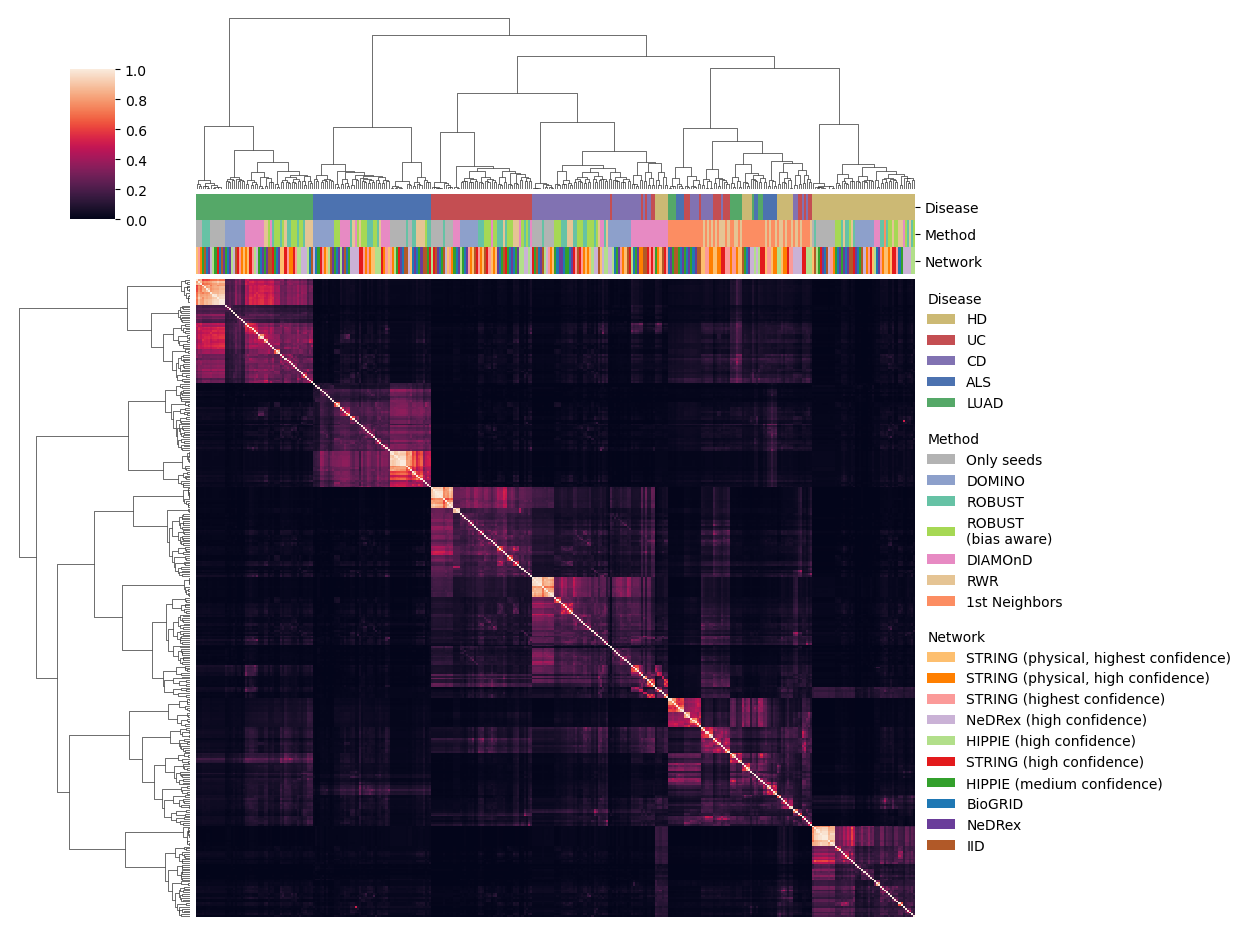

In [6]:
color_df = pd.DataFrame()
color_df["Disease"] = ann_df.seed_id.map(dict(zip(seed_meta_df.short, seed_meta_df.color)))
color_df["Method"] = ann_df.amim_id.map(dict(zip(amim_meta_df.id, amim_meta_df.color)))
color_df["Network"] = ann_df.network_id.map(dict(zip(network_meta_df.id, network_meta_df.color)))

g = sns.clustermap(
    data=df,
    col_colors=color_df,
    figsize=(15, 15),
    cbar_pos=(0.05, 0.85, 0.03, 0.1),
    method="ward",
)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_xlabel("")

handles = [Patch(facecolor=color, label=group) for group, color in zip(seed_meta_df.short, seed_meta_df.color)]
disease_legend  = g.ax_heatmap.legend(
    handles=handles,
    title='Disease',
    loc='upper left',
    bbox_to_anchor=(1, 1),  # adjust position as needed
    frameon=False,
)
disease_legend._legend_box.align = "left"
g.ax_heatmap.add_artist(disease_legend)

handles = [Patch(facecolor=color, label=group) for group, color in zip(amim_meta_df.label, amim_meta_df.color)]
method_legend = g.ax_heatmap.legend(
    handles=handles,
    title='Method',
    loc='upper left',
    bbox_to_anchor=(1, 0.78),  # adjust position as needed
    frameon=False,
)
method_legend._legend_box.align = "left"
g.ax_heatmap.add_artist(method_legend)

handles = [Patch(facecolor=color, label=group) for group, color in zip(network_meta_df.label, network_meta_df.color)]
network_legend = g.ax_heatmap.legend(
    handles=handles,
    title='Network',
    loc='upper left',
    bbox_to_anchor=(1, 0.47),  # adjust position as needed
    frameon=False,
)
network_legend._legend_box.align = "left"
#g.ax_heatmap.add_artist(network_legend)

plt.show()

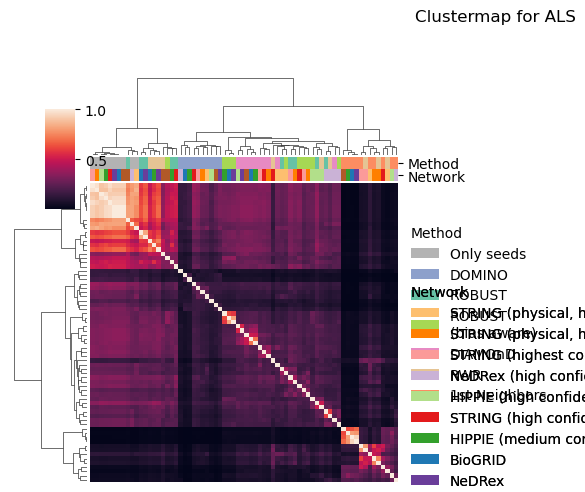

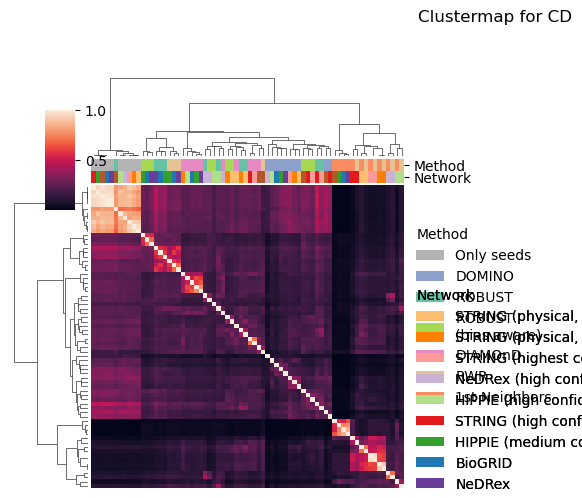

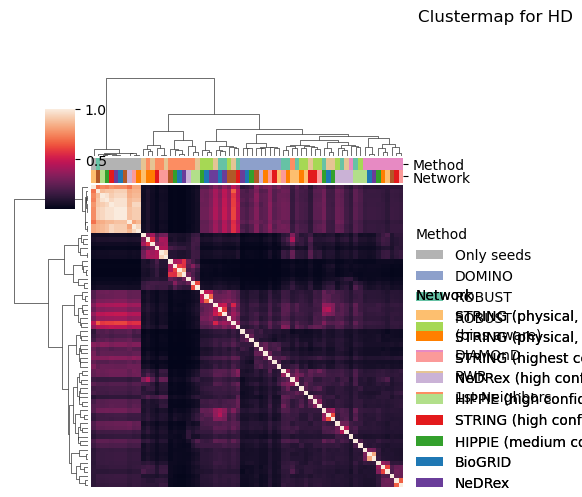

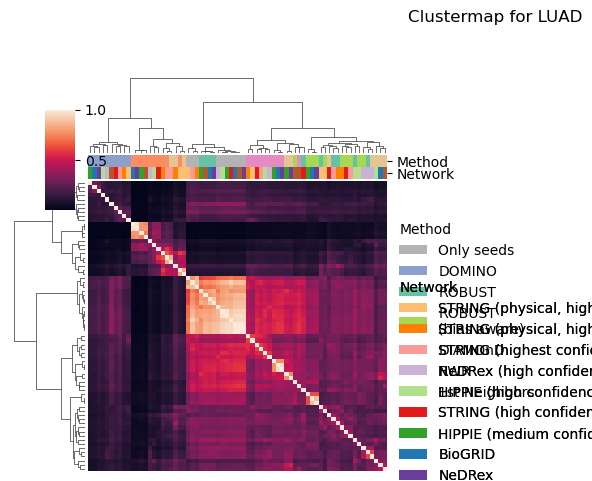

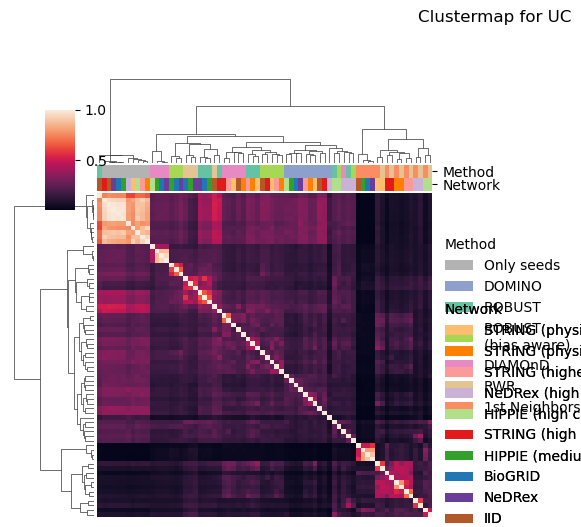

In [11]:
# Map colors
color_df = pd.DataFrame()
color_df["Method"] = ann_df.amim_id.map(dict(zip(amim_meta_df.id, amim_meta_df.color)))
color_df["Network"] = ann_df.network_id.map(dict(zip(network_meta_df.id, network_meta_df.color)))

# Loop over unique diseases
for disease in ann_df.seed_id.unique():
    disease_name = seed_meta_df.set_index("short").loc[disease, "label"] if "label" in seed_meta_df.columns else disease

    # Mask for samples matching current disease
    mask = ann_df.seed_id == disease

    # Filter data and annotations
    df_subset = df.loc[mask, mask]
    color_df_subset = color_df.loc[mask]

    # Create clustermap
    g = sns.clustermap(
        data=df_subset,
        col_colors=color_df_subset,
        figsize=(10, 10),
        cbar_pos=(0.05, 0.85, 0.03, 0.1),
        method="ward",
    )

    # Cleanup axes
    g.ax_heatmap.set_xticks([])
    g.ax_heatmap.set_yticks([])
    g.ax_heatmap.set_ylabel("")
    g.ax_heatmap.set_xlabel("")

    # Add legends
    handles = [Patch(facecolor=color, label=group) for group, color in zip(amim_meta_df.label, amim_meta_df.color)]
    method_legend = g.ax_heatmap.legend(
        handles=handles,
        title='Method',
        loc='upper left',
        bbox_to_anchor=(1, 0.9),
        frameon=False,
    )
    method_legend._legend_box.align = "left"
    g.ax_heatmap.add_artist(method_legend)

    handles = [Patch(facecolor=color, label=group) for group, color in zip(network_meta_df.label, network_meta_df.color)]
    network_legend = g.ax_heatmap.legend(
        handles=handles,
        title='Network',
        loc='upper left',
        bbox_to_anchor=(1, 0.7),
        frameon=False,
    )
    network_legend._legend_box.align = "left"
    g.ax_heatmap.add_artist(network_legend)

    # Title or filename
    g.fig.suptitle(f"Clustermap for {disease_name}", y=1.05)

    plt.show()